# Resolución de la ecuación de onda mediante series de Fourier

$$
\frac{\partial^2 u}{\partial t^2} = c^2\, \frac{\partial^2 u}{\partial t^2}, \qquad   0 < x < l, \quad t \in R,
$$
con las condiciones de borde
$$
u(t, 0 ) = 0\quad u(t, l) = 0, 
$$
y las condiciones iniciales 
$$ 
u(0, x) = f(x), \quad u_t(0, x) = g(x). 
$$
En el caso que nos ocupa es $f(x)$ es continua y definida a trozos mediante dos funciones lineales mientras que $g(x)$ es la función nula. 

Se trata de una simulación numérica del siguiente experimento:
[YouTube](https://www.youtube.com/watch?v=_X72on6CSL0)

## Solución explícita
Ver por ejemplo [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Section 4.2 The wave Equation

$$
u(t,x) = \sum_{n = 1}^{\infty} b_n\, \cos{\frac{n\, \pi\, c\, t}{l}}\, \sin{\frac{n\, \pi\, x}{l}} + d_n\, \sin{\frac{n\, \pi\, c\, t}{l}}\, \sin{\frac{n\, \pi\, x}{l}},
$$
en donde 
$$
b_n = \frac{2}{l}\int_{0}^{l} f(x)\, \sin{\frac{n\, \pi\, x}{l}}\, dx,  \quad 
d_n = \frac{2}{n\, \pi \, c}\int_{0}^{l} g(x)\, \sin{\frac{n\, \pi\, x}{l}}\, dx \quad
$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Algunos parámetros para definir la condición inicial 
c = 1.0
l = 1.0
xr = 0.2
ampl = 0.25
# Vamos a usar itegración numérica. ##########################
M = 400   # tamaño de la discretización en x para integrar y graficar 
################################################
x = np.linspace(0, l, M)
########################################
# Condiciones iniciales 
f = np.piecewise(x, [x < xr, x >xr], [lambda x: ampl*x/xr, lambda x: -ampl*x/(l-xr)+ampl*(1+xr/(l-xr))])
g = np.zeros(M)

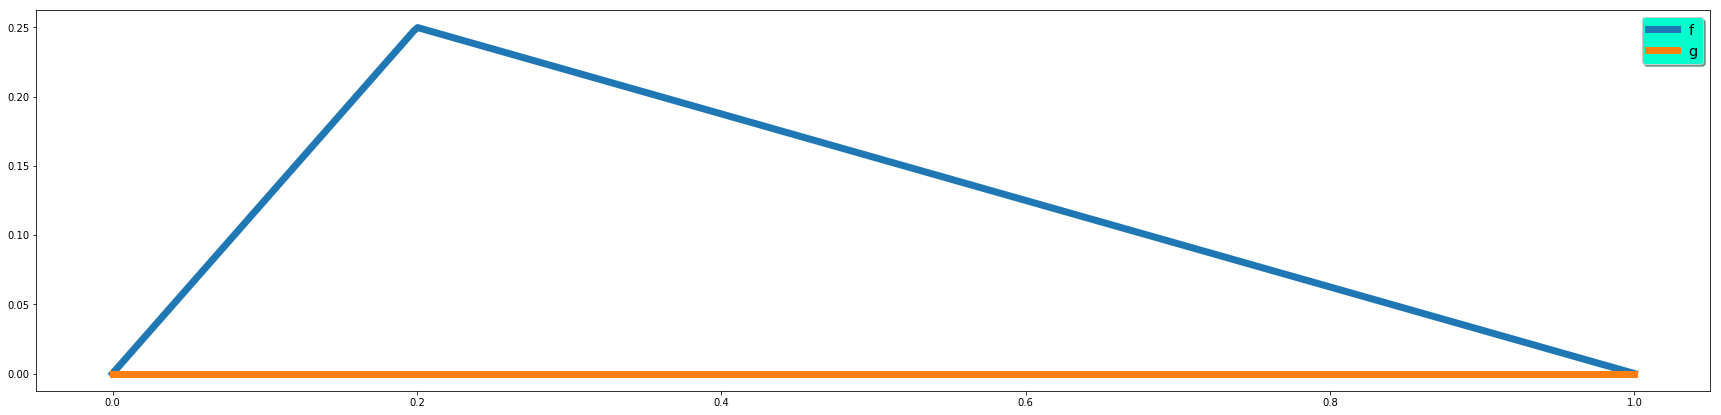

In [27]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
ax.plot(x,f, lw = 7, label='f')
ax.plot(x,g, lw = 7, label='g')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.show()

In [12]:
N = 35 # N es el número de terminos de los coeficientes de Fourier
import scipy.integrate as integrate #Los $b_n$ y $d_n$ se calculan por integración numérica
nn = np.array(range(1,N+1))
n = nn.reshape((N,1))
y = np.sin(n*x*np.pi/l) 
b = (2/l)*integrate.simps(y*f, x)
b = b.reshape((N,1))
dd = (2/l*np.pi*c)*integrate.simps(y*g, x) 
d  = dd.reshape((N,1))*1/n 
x_part1, x_part2 = b*y, d*y

In [20]:
def perfil(t):
    return np.sum(np.cos((c/l)*np.pi*t*n)*x_part1, axis = 0)  + (
        np.sum(np.sin((c/l)*np.pi*t*n)*x_part2, axis = 0))

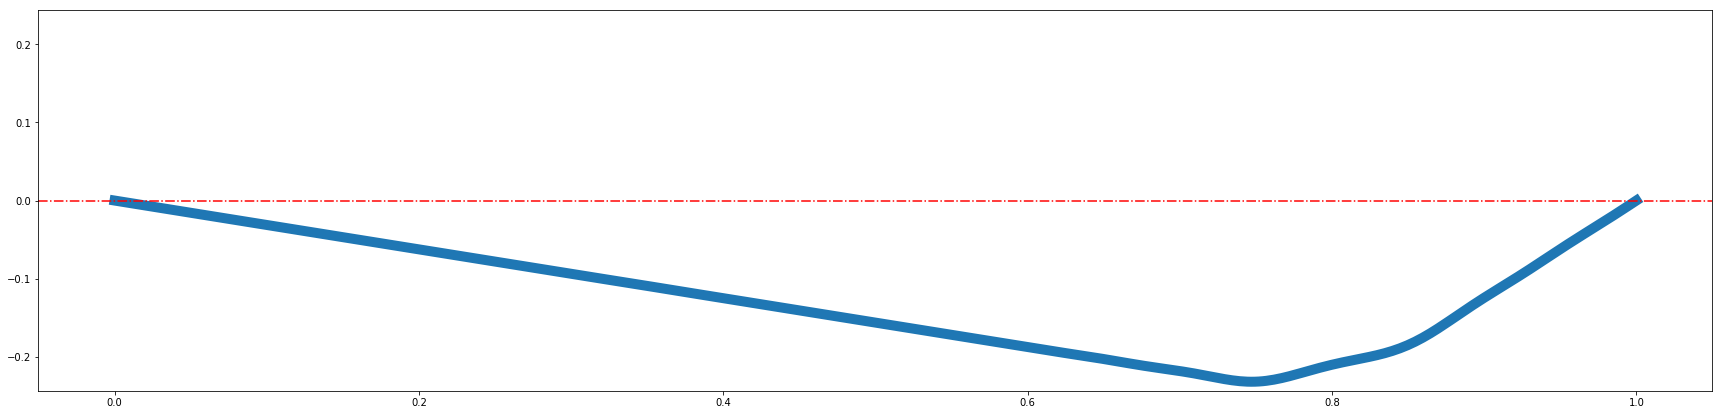

In [21]:
prof = perfil(1.05)
f_ampl = np.max(abs(prof))
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
ax.plot(x,prof, lw = 10)
plt.axhline(y=0.0, color='r', linestyle='-.')
ax.set_ylim([-f_ampl*1.05, f_ampl*1.05])
plt.show()

## Animación

In [13]:
import matplotlib.animation as animation

(-0.2625, 0.2625)

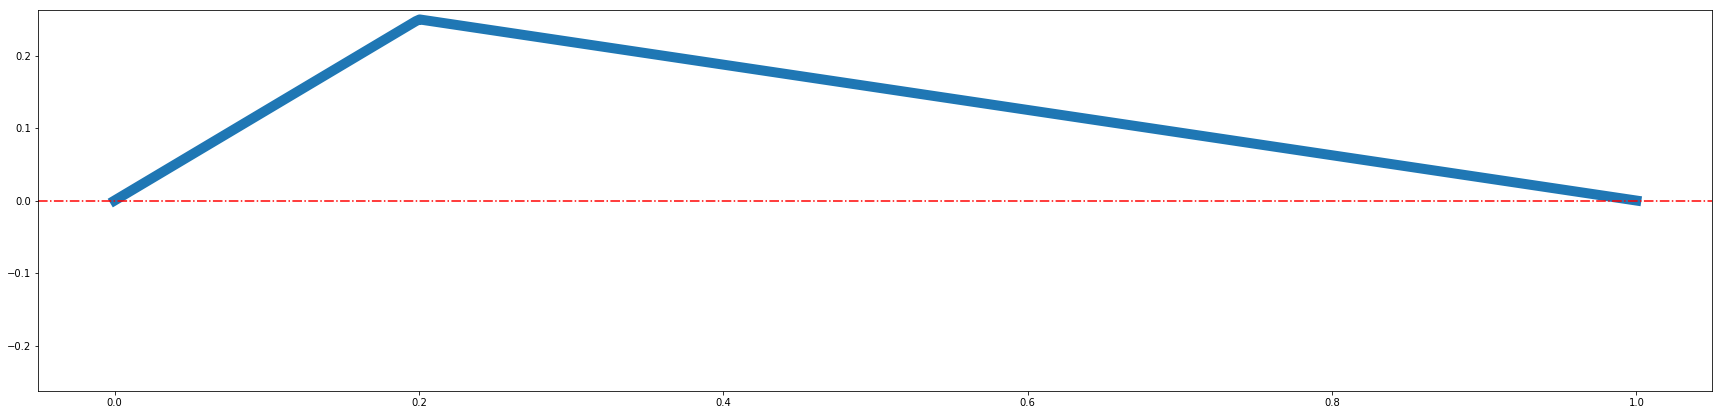

In [29]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
line, = ax.plot(x, f, lw =10)
ax.axhline(y=0.0, color='r', linestyle='-.')
ax.set_ylim([-ampl*1.05, ampl*1.05])

In [30]:
def animacion(i):
    line.set_ydata(perfil(i/100))  # update the data
    return line,

In [31]:
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

In [32]:
ani = animation.FuncAnimation(fig, animacion, np.arange(1, 200), init_func=init,
                              interval=50, blit=True)
ani.save('onda.mp4', metadata={'artist':'Socarronte'})
plt.show()